In [15]:
from transformers import ViTForImageClassification, ViTImageProcessor
from PIL import Image
import torch

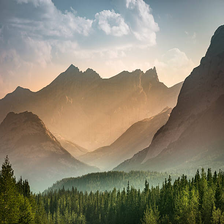

In [16]:
real_img = Image.open("../data/img/samples/real.jpg")
if real_img.mode != "RGB":
    real_img = real_img.convert("RGB")
real_img = real_img.resize((224, 224), Image.Resampling.LANCZOS)
real_img

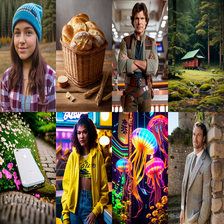

In [36]:
fake_img  = Image.open("../data/img/samples/fake.jpg")
if fake_img.mode != "RGB":
    fake_img = fake_img.convert("RGB")
fake_img = fake_img.resize((224, 224), Image.Resampling.LANCZOS)
fake_img

In [24]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTForImageClassification.from_pretrained("../models/vit_binary_classifier_20231205")

In [25]:
real_input = torch.tensor(processor(real_img, return_tensors="pt")['pixel_values'])
outputs = model(real_input)
predictions = outputs.logits.argmax(dim=-1)
predictions

/var/folders/rs/hvbh7zq16zz6m2qllm8l0_080000gn/T/ipykernel_67129/2682382533.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_input = torch.tensor(processor(real_img, return_tensors="pt")['pixel_values'])


tensor([0])

In [37]:
fake_input = torch.tensor(processor(fake_img, return_tensors="pt")['pixel_values'])
outputs = model(fake_input)
predictions = outputs.logits.argmax(dim=-1)
predictions

/var/folders/rs/hvbh7zq16zz6m2qllm8l0_080000gn/T/ipykernel_67129/4032572032.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  fake_input = torch.tensor(processor(fake_img, return_tensors="pt")['pixel_values'])


tensor([1])